In [122]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [123]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv("lending_data.csv")

# Review the DataFrame
lending_df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [124]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_df["loan_status"]

# Separate the X variable, the features
columns_to_drop = ['loan_status']
X = lending_df.drop(columns=columns_to_drop)

In [125]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [126]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [127]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Set random state
random_state = 1

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, stratify=y)

# Check the shape of the training data
print("Shape of X_train:", X_train.shape)

Shape of X_train: (58152, 7)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [139]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Set random state for reproducibility
random_state = 1

# Instantiate the Logistic Regression model with specified parameters
# - solver='lbfgs': Algorithm to use in the optimization problem
# - max_iter=200: Maximum number of iterations taken for the solver to converge
# - random_state=random_state: Set the random seed for reproducibility
classifier = LogisticRegression(
    solver='lbfgs', 
    max_iter=200, 
    random_state=random_state
)
# Display the classifier object
print("Logistic Regression Model:")
print(classifier)

# Fit the model using training data
classifier.fit(
    X_train, 
    y_train
)


# Display message to indicate the completion of model fitting
print("Logistic Regression Model trained successfully!")


Logistic Regression Model:
LogisticRegression(max_iter=200, random_state=1)
Logistic Regression Model trained successfully!


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [129]:
# Make predictions using the testing data
# - classifier.score(X_train, y_train): Score of the model on the training data
# - classifier.score(X_test, y_test): Score of the model on the testing data
train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

# Display the scores
print(f"Training Data Score: {train_score}")
print(f"Testing Data Score: {test_score}")


Training Data Score: 0.9926743706149401
Testing Data Score: 0.993912505158894


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [142]:
# Generate predictions using the testing data
predictions = classifier.predict(X_test)

# Create a DataFrame to store the predictions and actual values
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

# Display the first 10 rows of the results DataFrame
print("First 10 rows of predictions and actual values:")
print(results.head(10).to_string(index=False))



First 10 rows of predictions and actual values:
 Prediction  Actual
          0       0
          1       1
          0       0
          0       0
          0       0
          0       0
          0       0
          0       0
          0       0
          0       0


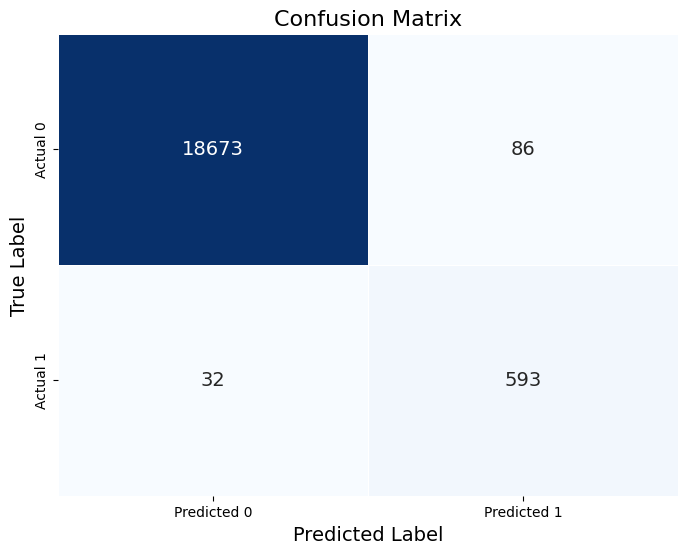

Accuracy Score: 0.993912505158894
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.95      0.91       625

    accuracy                           0.99     19384
   macro avg       0.94      0.97      0.95     19384
weighted avg       0.99      0.99      0.99     19384



In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Define row and column labels for the confusion matrix DataFrame
row_labels = ["Actual 0", "Actual 1"]
column_labels = ["Predicted 0", "Predicted 1"]

# Create a DataFrame to display the confusion matrix with clearer formatting
cm_df = pd.DataFrame(cm, index=row_labels, columns=column_labels)

# Set up the color palette
sns.set_palette("pastel")

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, annot_kws={"size": 14})

# Set plot labels and title
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Show the plot
plt.show()

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)

# Display the accuracy score
print(f"Accuracy Score: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Model has a high accuracy of approx. 0.994, meaning the model correctly predicts for 99.4% of test data.
For 0 (healthy loan), prediction is perfect at 1.00, meaning the model predicts healthy loans entirely.
For 1 (high risk loan) precision is lower at .87, recall is high at 0.95. 
Overall, the model performs very well in predicting the healthy loans, and is strong in identifying high risk loans. There is lower precision for high risk loans, particularly with false positives.

---